In [ ]:
import requests
import bs4 
import pandas as pd 

In [ ]:
pages=[]
prices=[]
ratings=[]   #empty list
title=[]
urls=[]

In [ ]:
page_no = 30 #number of page i

In [ ]:
for page in range(1, page_no+1):
  url = ('http://books.toscrape.com/catalogue/page-{}.html'.format(page))
                                                                                          # number of page read 

  pages.append(url)

In [ ]:
pages

['http://books.toscrape.com/catalogue/page-1.html',
 'http://books.toscrape.com/catalogue/page-2.html',
 'http://books.toscrape.com/catalogue/page-3.html',
 'http://books.toscrape.com/catalogue/page-4.html',
 'http://books.toscrape.com/catalogue/page-5.html',
 'http://books.toscrape.com/catalogue/page-6.html',
 'http://books.toscrape.com/catalogue/page-7.html',
 'http://books.toscrape.com/catalogue/page-8.html',
 'http://books.toscrape.com/catalogue/page-9.html',
 'http://books.toscrape.com/catalogue/page-10.html',
 'http://books.toscrape.com/catalogue/page-11.html',
 'http://books.toscrape.com/catalogue/page-12.html',
 'http://books.toscrape.com/catalogue/page-13.html',
 'http://books.toscrape.com/catalogue/page-14.html',
 'http://books.toscrape.com/catalogue/page-15.html',
 'http://books.toscrape.com/catalogue/page-16.html',
 'http://books.toscrape.com/catalogue/page-17.html',
 'http://books.toscrape.com/catalogue/page-18.html',
 'http://books.toscrape.com/catalogue/page-19.html',
 '

In [ ]:
for item in pages:
  
  pages = requests.get(item)                                                             #read every page

  page_read = bs4.BeautifulSoup(pages.text, 'html.parser')

In [ ]:
page_read

In [ ]:
for t in page_read('h3'):
  titlee = t.getText()                                                                   #get all title
  title.append(titlee)

In [ ]:
for p in page_read('p', class_='price_color'):
  price = p.getText()                                                                    # get all price
  prices.append(price)

In [ ]:
prices

In [ ]:
for s in page_read.find_all('p', class_= 'star-rating'):
  for k, v in s.attrs.items():
    star = v[1]
                                                                                         # find all books rating
    ratings.append(star)
    print(star)

In [ ]:
divs=page_read.find_all('div',class_='image_container')
for thumbs in divs:
    tagss=thumbs.find('img',class_='thumbnail')
    links='http://books.toscrape.com/' + str(tagss['src'])
    newlinks=links.replace('..','')                                                      #find all images
    urls.append(newlinks)
       

In [ ]:
urls

### **Data Processing**

In [ ]:
web_data = {'Title':title,'Price':prices,'Ratings':ratings,'URL':urls}               # create a dictionary

In [ ]:
print(len(title))
print(len(prices))                                                                   # see the size of data    
print(len(ratings))
print(len(urls))

20
20
20
20


In [ ]:
df = pd.DataFrame(web_data)                                                         #creating dataframe

In [ ]:
df

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,3,http://books.toscrape.com//media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com//media/cache/94/b1/9...
10,The Black Maria,52.15,1,http://books.toscrape.com//media/cache/58/46/5...
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,2,http://books.toscrape.com//media/cache/0b/bc/0...
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
20,It's Only the Himalayas,45.17,2,http://books.toscrape.com//media/cache/27/a5/2...


In [ ]:
df.index+=1
df

,Title,Price,Ratings,URL
1,A Light in the ...,Â£51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,Â£53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,Â£50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,Â£47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,Â£54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
6,The Requiem Red,Â£22.65,One,http://books.toscrape.com//media/cache/68/33/6...
7,The Dirty Little Secrets ...,Â£33.34,Four,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,Â£17.93,Three,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,Â£22.60,Four,http://books.toscrape.com//media/cache/66/88/6...
10,The Black Maria,Â£52.15,One,http://books.toscrape.com//media/cache/58/46/5...


In [ ]:
df['Price']=df['Price'].str.replace('Â£','')

In [ ]:
df

,Title,Price,Ratings,URL
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
6,The Requiem Red,22.65,One,http://books.toscrape.com//media/cache/68/33/6...
7,The Dirty Little Secrets ...,33.34,Four,http://books.toscrape.com//media/cache/92/27/9...
8,The Coming Woman: A ...,17.93,Three,http://books.toscrape.com//media/cache/3d/54/3...
9,The Boys in the ...,22.60,Four,http://books.toscrape.com//media/cache/66/88/6...
10,The Black Maria,52.15,One,http://books.toscrape.com//media/cache/58/46/5...


In [ ]:
df.sort_values(by='Price',ascending=False, inplace = True)

In [ ]:
df

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,Three,http://books.toscrape.com//media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,Five,http://books.toscrape.com//media/cache/be/a5/b...
2,Tipping the Velvet,53.74,One,http://books.toscrape.com//media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,Five,http://books.toscrape.com//media/cache/94/b1/9...
10,The Black Maria,52.15,One,http://books.toscrape.com//media/cache/58/46/5...
1,A Light in the ...,51.77,Three,http://books.toscrape.com//media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,Two,http://books.toscrape.com//media/cache/0b/bc/0...
3,Soumission,50.10,One,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,Four,http://books.toscrape.com//media/cache/32/51/3...
20,It's Only the Himalayas,45.17,Two,http://books.toscrape.com//media/cache/27/a5/2...


In [ ]:
df['Ratings']=df['Ratings'].replace({'Three':3,'One':1,'Two':2,'Four':4,'Five':5})

In [ ]:
df

,Title,Price,Ratings,URL
16,Our Band Could Be ...,57.25,3,http://books.toscrape.com//media/cache/54/60/5...
5,Sapiens: A Brief History ...,54.23,5,http://books.toscrape.com//media/cache/be/a5/b...
2,Tipping the Velvet,53.74,1,http://books.toscrape.com//media/cache/26/0c/2...
14,Scott Pilgrim's Precious Little ...,52.29,5,http://books.toscrape.com//media/cache/94/b1/9...
10,The Black Maria,52.15,1,http://books.toscrape.com//media/cache/58/46/5...
1,A Light in the ...,51.77,3,http://books.toscrape.com//media/cache/2c/da/2...
19,Libertarianism for Beginners,51.33,2,http://books.toscrape.com//media/cache/0b/bc/0...
3,Soumission,50.10,1,http://books.toscrape.com//media/cache/3e/ef/3...
4,Sharp Objects,47.82,4,http://books.toscrape.com//media/cache/32/51/3...
20,It's Only the Himalayas,45.17,2,http://books.toscrape.com//media/cache/27/a5/2...


In [ ]:
df.dtypes

Title      object
Price      object
Ratings     int64
URL        object
dtype: object

In [ ]:
df['Price']=df['Price'].astype(float)

In [ ]:
df.corr()

,Price,Ratings
Price,1.000000,-0.075857
Ratings,-0.075857,1.000000


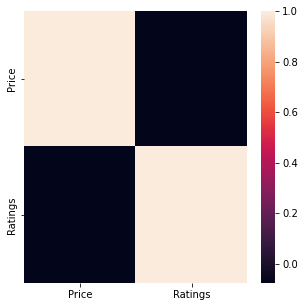

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5,5))
sns.heatmap(df.corr())